In [9]:
import scipy
import os
import numpy as np
import matplotlib
import pandas as pd
import sklearn
import seaborn as sns

ImportError: cannot import name 'dump' from 'joblib' (unknown location)

In [2]:
my_data = pd.read_csv('dddst.csv')

In [3]:
my_data_test=pd.read_csv('dementia_dataset.csv')

In [4]:
my_data.shape

(1210, 15)

In [4]:
my_data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0003,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0004,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0005,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0006,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0007,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0008,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0009,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [5]:
my_data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,1210.000000,1210.000000,1210.000000,1210.000000,1159.000000,1204.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,1.906612,575.995868,77.171901,14.591736,2.459879,27.277409,0.292975,1483.016529,0.729582,1.199258
std,0.951446,612.799266,7.706369,2.929601,1.134285,3.791023,0.372093,173.623543,0.037150,0.136936
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,1.000000,27.000000,0.000000,1353.250000,0.700250,1.104000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1463.000000,0.728500,1.199500
75%,2.000000,846.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1590.000000,0.756000,1.297000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
print(my_data["Group"].value_counts())
print("-----")
print(my_data["M/F"].value_counts())
print("-----")
print(my_data["MRI ID"].value_counts())
print("-----")
print(my_data["Hand"].value_counts())
print("-----")
print(my_data["Subject ID"].value_counts())

Nondemented    602
Demented       461
Converted      147
Name: Group, dtype: int64
-----
F    688
M    522
Name: M/F, dtype: int64
-----
OAS2_0001_MR1      1
OAS2_0159_MR4      1
OAS2_0159_MR2      1
OAS2_0159_MR1      1
OAS2_0158_MR284    1
                  ..
OAS2_0151_MR21     1
OAS2_0151_MR20     1
OAS2_0151_MR19     1
OAS2_0151_MR18     1
OAS2_0161_MR197    1
Name: MRI ID, Length: 1210, dtype: int64
-----
R    1210
Name: Hand, dtype: int64
-----
OAS2_0001    2
OAS2_0813    1
OAS2_0811    1
OAS2_0810    1
OAS2_0809    1
            ..
OAS2_0404    1
OAS2_0403    1
OAS2_0402    1
OAS2_0401    1
OAS2_1209    1
Name: Subject ID, Length: 1209, dtype: int64


In [7]:
my_data.nunique()

Subject ID    1209
MRI ID        1210
Group            3
Visit            5
MR Delay       203
M/F              2
Hand             1
Age             39
EDUC            12
SES              5
MMSE            18
CDR              4
eTIV           286
nWBV           136
ASF            265
dtype: int64

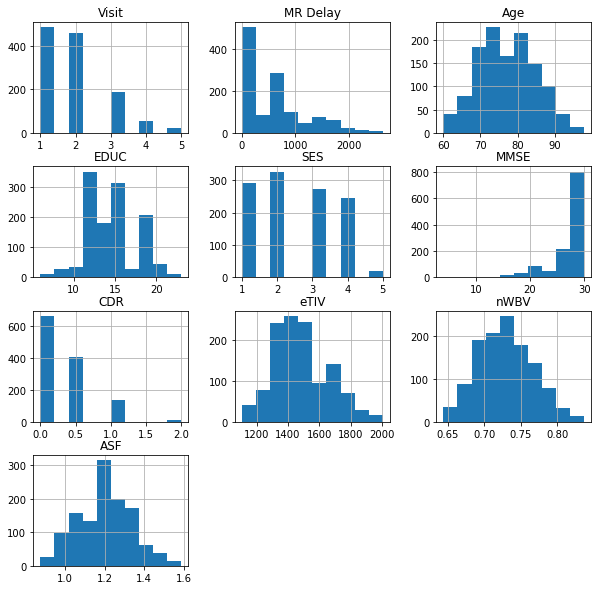

In [8]:
# Univariate Histograms
import matplotlib.pyplot as plt
my_data.hist(figsize = (10,10))
plt.show()

Text(0.5, 0, 'Groups')

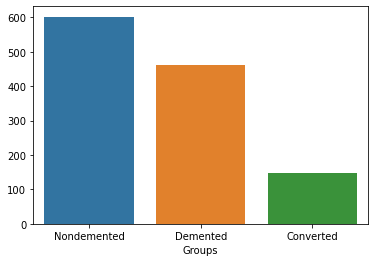

In [9]:
import warnings
warnings.filterwarnings('ignore')
xs = my_data['Group'].value_counts().index
ys = my_data['Group'].value_counts().values
ax = sns.barplot(x=xs, y=ys)
ax.set_xlabel("Groups")

Text(0.5, 0, 'Gender')

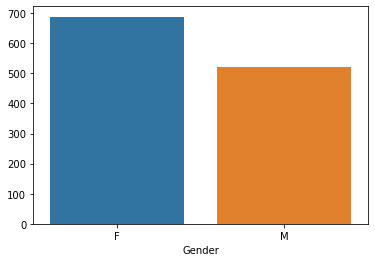

In [10]:
xs = my_data['M/F'].value_counts().index
ys = my_data['M/F'].value_counts().values

ax = sns.barplot(x=xs,y=ys)
ax.set_xlabel("Gender")

In [11]:
dataset = my_data.copy()
test_dataset=my_data_test.copy()

In [12]:
dataset.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0003,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0004,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [13]:
dataset.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           51
MMSE           6
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [14]:
my_data_test.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [15]:
dataset.SES.fillna ( my_data.SES.mode() [0], inplace=True ) # impute mode
dataset.MMSE.fillna ( my_data.MMSE.mean() , inplace=True ) # impute mean
dataset.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [16]:
my_data_test.SES.fillna ( my_data.SES.mode() [0], inplace=True ) # impute mode
my_data_test.MMSE.fillna ( my_data.MMSE.mean() , inplace=True ) # impute mean
my_data_test.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [17]:
dataset=dataset.drop(['Subject ID', 'MRI ID','Hand'], axis=1)

In [18]:
my_data_test=my_data_test.drop(['Subject ID', 'MRI ID','Hand'], axis=1)

In [19]:
dataset.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [20]:
dataset = dataset.rename(columns = {'M/F' : 'Gender'})
dataset = dataset.rename(columns = {'Group' : 'Dementia'})

In [21]:
my_data_test = my_data_test.rename(columns = {'M/F' : 'Gender'})
my_data_test = my_data_test.rename(columns = {'Group' : 'Dementia'})

In [22]:
dataset=dataset.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)

In [23]:
my_data_test=my_data_test.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)

In [24]:
dataset=dataset.replace('M', 0).replace('F', 1)

In [25]:
my_data_test=my_data_test.replace('M', 0).replace('F', 1)

In [26]:
dataset.head()

,Dementia,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,0,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [27]:
my_data_test.head()

,Dementia,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,0,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [28]:
my_data_test[my_data_test['Dementia']==2]

,Dementia,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,2,1,0,1,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,2,3,489,1,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,2,4,1933,1,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,2,1,0,0,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,2,2,756,0,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,2,3,1563,0,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,2,1,0,1,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,2,2,446,1,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,2,3,1588,1,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,2,1,0,1,71,16,1.0,27.0,0.0,1289,0.771,1.362


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dementia  1210 non-null   int64  
 1   Visit     1210 non-null   int64  
 2   MR Delay  1210 non-null   int64  
 3   Gender    1210 non-null   int64  
 4   Age       1210 non-null   int64  
 5   EDUC      1210 non-null   int64  
 6   SES       1210 non-null   float64
 7   MMSE      1210 non-null   float64
 8   CDR       1210 non-null   float64
 9   eTIV      1210 non-null   int64  
 10  nWBV      1210 non-null   float64
 11  ASF       1210 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 113.6 KB


In [30]:
my_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dementia  373 non-null    int64  
 1   Visit     373 non-null    int64  
 2   MR Delay  373 non-null    int64  
 3   Gender    373 non-null    int64  
 4   Age       373 non-null    int64  
 5   EDUC      373 non-null    int64  
 6   SES       373 non-null    float64
 7   MMSE      373 non-null    float64
 8   CDR       373 non-null    float64
 9   eTIV      373 non-null    int64  
 10  nWBV      373 non-null    float64
 11  ASF       373 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 35.1 KB


In [31]:
dataset.describe()

,Dementia,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,0.623967,1.906612,575.995868,0.568595,77.171901,14.591736,2.440496,27.277409,0.292975,1483.016529,0.729582,1.199258
std,0.691377,0.951446,612.799266,0.495477,7.706369,2.929601,1.113945,3.781605,0.372093,173.623543,0.037150,0.136936
min,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,1.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1353.250000,0.700250,1.104000
50%,1.000000,2.000000,552.000000,1.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1463.000000,0.728500,1.199500
75%,1.000000,2.000000,846.000000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1590.000000,0.756000,1.297000
max,2.000000,5.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [32]:
X_train, y_train = dataset.drop ('Dementia', axis=1).values , dataset.Dementia.values

In [33]:
X_test,y_test = my_data_test.drop ('Dementia', axis=1).values , my_data_test.Dementia.values

In [34]:
X_train.shape,X_test.shape

((1210, 11), (373, 11))

In [35]:
import numpy as np
from imblearn.over_sampling import SMOTE

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

smt = SMOTE ()
X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [602 461 147]

Number of observations in the target variable after oversampling of the minority class: [602 602 602]


In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

In [37]:
from xgboost import XGBClassifier

In [38]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train_std, y_train.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [39]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented','Converted']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP',' FP'], ['FN', 'TP','FN'],['FN','FP','TN']]
    for i in range(3):
        for j in range(3):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [40]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test_std)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

In [41]:
total_accuracy = {}
def accuracy(model):
    pred = model.predict(X_test_std)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu



Confusion Matrix:
[[190   0   0]
 [  0 146   0]
 [  0   0  37]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00        37

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



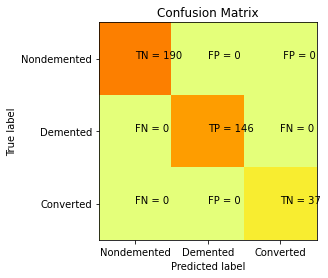


Acuuracy Of the Model:  1.0 




In [42]:
report_performance(clf_xgb) 
accuracy(clf_xgb)

In [43]:
import pickle
pickle.dump(clf_xgb, open('xgb.sav', 'wb'))

In [44]:
model = pickle.load(open('xgb.sav', 'rb'))

In [45]:
test_data=[[1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883]]
test_data1=[[1,0,0,75,12,2.0,23.0,0.5,1678,0.736,1.046]]
test_data2=[[4,1933,1,92,14,1.0,27.0,0.5,1423,0.696,1.234]]

In [46]:
test_data=np.array(test_data)
test_data1=np.array(test_data1)
test_data2=np.array(test_data2)

In [47]:
test_data=std_scaler.transform (test_data)
test_data1=std_scaler.transform (test_data1)
test_data2=std_scaler.transform (test_data2)

In [48]:
pred=model.predict(test_data)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')


Nondemented


In [49]:
pred=model.predict(test_data1)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')


Demented


In [50]:
pred=model.predict(test_data2)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Converted


In [51]:
from catboost import CatBoostClassifier
cat_classifier = CatBoostClassifier(iterations=1000, verbose = 0)
cat_classifier.fit(X_train_std, y_train.ravel())



Confusion Matrix:
[[190   0   0]
 [  0 146   0]
 [  0   0  37]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00        37

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



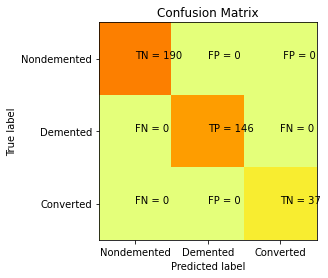


Acuuracy Of the Model:  1.0 




In [52]:
report_performance(cat_classifier) 
accuracy(cat_classifier)

In [53]:
import pickle
pickle.dump(cat_classifier, open('catboost.sav', 'wb'))

In [54]:
model1 = pickle.load(open('catboost.sav', 'rb'))

In [55]:
pred=model1.predict(test_data)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Nondemented


In [56]:
pred=model1.predict(test_data1)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Demented


In [57]:
pred=model1.predict(test_data2)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Converted


In [58]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [59]:
clf1_tabnet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
clf1_tabnet.fit(
    X_train_std,y_train,
    eval_set=[(X_train_std, y_train), (X_test_std, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=500 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)            

epoch 0  | loss: 1.23992 | train_accuracy: 0.38483 | valid_accuracy: 0.59786 |  0:00:00s
epoch 1  | loss: 1.06751 | train_accuracy: 0.43079 | valid_accuracy: 0.64343 |  0:00:01s
epoch 2  | loss: 1.06462 | train_accuracy: 0.45847 | valid_accuracy: 0.62198 |  0:00:02s
epoch 3  | loss: 1.02315 | train_accuracy: 0.48228 | valid_accuracy: 0.6193  |  0:00:02s
epoch 4  | loss: 1.01706 | train_accuracy: 0.49779 | valid_accuracy: 0.63003 |  0:00:03s
epoch 5  | loss: 1.00719 | train_accuracy: 0.51218 | valid_accuracy: 0.67024 |  0:00:04s
epoch 6  | loss: 0.97291 | train_accuracy: 0.54596 | valid_accuracy: 0.76944 |  0:00:04s
epoch 7  | loss: 0.96386 | train_accuracy: 0.5454  | valid_accuracy: 0.74263 |  0:00:05s
epoch 8  | loss: 0.958   | train_accuracy: 0.55371 | valid_accuracy: 0.7185  |  0:00:05s
epoch 9  | loss: 0.93984 | train_accuracy: 0.57697 | valid_accuracy: 0.71046 |  0:00:06s
epoch 10 | loss: 0.92083 | train_accuracy: 0.5742  | valid_accuracy: 0.7319  |  0:00:07s
epoch 11 | loss: 0.94

epoch 93 | loss: 0.54975 | train_accuracy: 0.79956 | valid_accuracy: 0.88472 |  0:00:59s
epoch 94 | loss: 0.54    | train_accuracy: 0.81285 | valid_accuracy: 0.91421 |  0:01:00s
epoch 95 | loss: 0.5415  | train_accuracy: 0.80897 | valid_accuracy: 0.88204 |  0:01:00s
epoch 96 | loss: 0.5204  | train_accuracy: 0.80565 | valid_accuracy: 0.87936 |  0:01:01s
epoch 97 | loss: 0.52012 | train_accuracy: 0.81285 | valid_accuracy: 0.89544 |  0:01:02s
epoch 98 | loss: 0.53132 | train_accuracy: 0.81008 | valid_accuracy: 0.90885 |  0:01:02s
epoch 99 | loss: 0.52416 | train_accuracy: 0.81728 | valid_accuracy: 0.90349 |  0:01:03s
epoch 100| loss: 0.53476 | train_accuracy: 0.81894 | valid_accuracy: 0.90617 |  0:01:03s
epoch 101| loss: 0.50832 | train_accuracy: 0.81672 | valid_accuracy: 0.90617 |  0:01:04s
epoch 102| loss: 0.5105  | train_accuracy: 0.81229 | valid_accuracy: 0.8874  |  0:01:05s
epoch 103| loss: 0.50642 | train_accuracy: 0.81008 | valid_accuracy: 0.88204 |  0:01:05s
epoch 104| loss: 0.51

epoch 186| loss: 0.38779 | train_accuracy: 0.90476 | valid_accuracy: 0.9437  |  0:02:00s
epoch 187| loss: 0.35203 | train_accuracy: 0.90642 | valid_accuracy: 0.95174 |  0:02:00s
epoch 188| loss: 0.37299 | train_accuracy: 0.90753 | valid_accuracy: 0.93834 |  0:02:01s
epoch 189| loss: 0.35246 | train_accuracy: 0.89646 | valid_accuracy: 0.91957 |  0:02:02s
epoch 190| loss: 0.37485 | train_accuracy: 0.89424 | valid_accuracy: 0.91957 |  0:02:02s
epoch 191| loss: 0.38693 | train_accuracy: 0.89812 | valid_accuracy: 0.93029 |  0:02:03s
epoch 192| loss: 0.38277 | train_accuracy: 0.90864 | valid_accuracy: 0.9437  |  0:02:04s
epoch 193| loss: 0.37943 | train_accuracy: 0.90698 | valid_accuracy: 0.94906 |  0:02:04s
epoch 194| loss: 0.38214 | train_accuracy: 0.90144 | valid_accuracy: 0.94102 |  0:02:05s
epoch 195| loss: 0.40048 | train_accuracy: 0.90033 | valid_accuracy: 0.93834 |  0:02:06s
epoch 196| loss: 0.39441 | train_accuracy: 0.9031  | valid_accuracy: 0.93566 |  0:02:06s
epoch 197| loss: 0.36

epoch 279| loss: 0.30564 | train_accuracy: 0.92746 | valid_accuracy: 0.95174 |  0:03:02s
epoch 280| loss: 0.31287 | train_accuracy: 0.92968 | valid_accuracy: 0.94906 |  0:03:03s
epoch 281| loss: 0.33975 | train_accuracy: 0.92746 | valid_accuracy: 0.95442 |  0:03:04s
epoch 282| loss: 0.31624 | train_accuracy: 0.9247  | valid_accuracy: 0.94906 |  0:03:04s
epoch 283| loss: 0.31787 | train_accuracy: 0.9247  | valid_accuracy: 0.95174 |  0:03:05s
epoch 284| loss: 0.32555 | train_accuracy: 0.92857 | valid_accuracy: 0.95442 |  0:03:06s
epoch 285| loss: 0.34353 | train_accuracy: 0.92746 | valid_accuracy: 0.95174 |  0:03:06s
epoch 286| loss: 0.31667 | train_accuracy: 0.92968 | valid_accuracy: 0.95174 |  0:03:07s
epoch 287| loss: 0.31669 | train_accuracy: 0.92913 | valid_accuracy: 0.95174 |  0:03:08s
epoch 288| loss: 0.34001 | train_accuracy: 0.933   | valid_accuracy: 0.9571  |  0:03:08s
epoch 289| loss: 0.31097 | train_accuracy: 0.93355 | valid_accuracy: 0.9571  |  0:03:09s
epoch 290| loss: 0.33

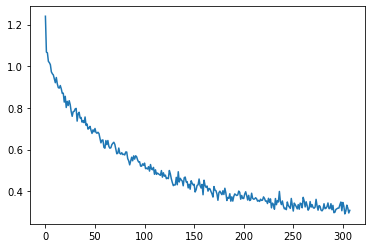

In [60]:
plt.plot(clf1_tabnet.history['loss'])
plt.show()

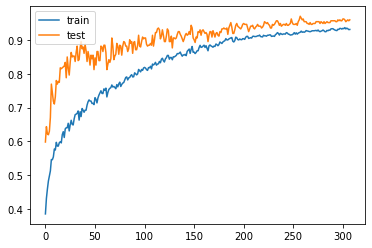

In [61]:
plt.plot(clf1_tabnet.history['train_accuracy'])
plt.plot(clf1_tabnet.history['valid_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Confusion Matrix:
[[184   5   1]
 [  1 142   3]
 [  1   0  36]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.97      0.97      0.97       146
           2       0.90      0.97      0.94        37

    accuracy                           0.97       373
   macro avg       0.95      0.97      0.96       373
weighted avg       0.97      0.97      0.97       373



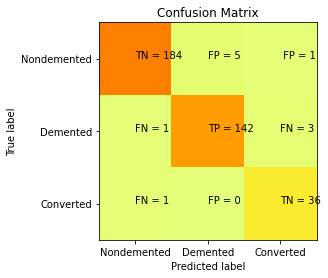


Acuuracy Of the Model:  0.9705093833780161 




In [62]:
report_performance(clf1_tabnet) 
accuracy(clf1_tabnet)

In [63]:
clf1_tabnet.save_model('tabnet_model')

Successfully saved model at tabnet_model.zip


'tabnet_model.zip'

In [64]:
model2 = TabNetClassifier()
model2.load_model('tabnet_model.zip')

In [65]:
pred=model2.predict(test_data)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Nondemented


In [66]:
pred=model2.predict(test_data1)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Demented


In [67]:
pred=model2.predict(test_data2)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Converted


In [68]:
estimator = []

In [69]:
estimator.append(('catboost', CatBoostClassifier(iterations=1000, verbose = 0)))
estimator.append(('xgb', XGBClassifier(random_state=0)))

In [70]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
voting_cls=VotingClassifier(estimators = estimator, voting ='soft')

In [71]:
voting_cls = voting_cls.fit(X_train_std, y_train)



Confusion Matrix:
[[190   0   0]
 [  0 146   0]
 [  0   0  37]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00        37

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



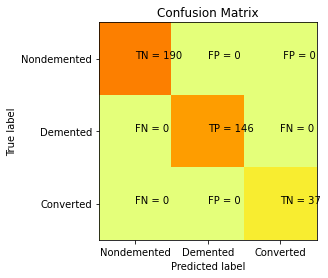


Acuuracy Of the Model:  1.0 




In [72]:
report_performance(voting_cls) 
accuracy(voting_cls)

In [73]:
import pickle
pickle.dump(voting_cls, open('voting_cls.sav', 'wb'))

In [74]:
en_model = pickle.load(open('voting_cls.sav', 'rb'))

In [75]:
pred=en_model.predict(test_data)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Nondemented


In [76]:
pred=en_model.predict(test_data1)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Demented


In [77]:
pred=en_model.predict(test_data2)
if pred[0]==0:
    print('Nondemented')
elif pred[0]==1:
    print('Demented')
else:
    print('Converted')

Converted
